## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
numMice = len(study_data_complete)
numMice1 = len(mouse_metadata)
numMice2 = len(study_results)
numMice3 = len(study_data_complete["Mouse ID"].unique()) 
print(numMice, numMice1, numMice2, numMice3)
print("Number of mice: "+ str(numMice3))

1893 249 1893 249
Number of mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplMice = study_data_complete["Mouse ID"].value_counts()
duplMice.head()

g989    13
j913    10
a444    10
k483    10
v991    10
Name: Mouse ID, dtype: int64

In [5]:
# add COunt of Mouse ID dataframe title
#Convert the duplicate count Series into a DataFrame
duplMice_df = pd.DataFrame(duplMice)

duplMice_df = duplMice_df.rename(
    columns={"Mouse ID": "Count of Mouse",
    "Count of Mouse": [duplMice]})
duplMice_df.head()

,Count of Mouse
g989,13
j913,10
a444,10
k483,10
v991,10


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# use collections.Counter reduce repeat call to count, get items(ketys : value) in Counter
from collections import Counter
duplMice = study_data_complete["Mouse ID"]
d = Counter(map(tuple, duplMice))
print(Counter(duplMice))

Counter({'g989': 13, 'b128': 10, 'h246': 10, 'p189': 10, 'b559': 10, 'y260': 10, 'z969': 10, 'r604': 10, 'n304': 10, 'l700': 10, 'l725': 10, 'a818': 10, 't724': 10, 'k382': 10, 'w422': 10, 'c139': 10, 'y163': 10, 'k483': 10, 'z581': 10, 'a251': 10, 'u327': 10, 'g497': 10, 'c832': 10, 'o331': 10, 'm650': 10, 'm550': 10, 'r701': 10, 'j913': 10, 'a411': 10, 'a444': 10, 'd251': 10, 'j989': 10, 'k403': 10, 'c758': 10, 'x402': 10, 'r811': 10, 'a644': 10, 'i177': 10, 'g791': 10, 'a520': 10, 'u196': 10, 'm546': 10, 'n364': 10, 's508': 10, 'e662': 10, 'z578': 10, 'a492': 10, 'z795': 10, 'e584': 10, 'e213': 10, 'j755': 10, 's565': 10, 'b879': 10, 'i901': 10, 'k862': 10, 'j984': 10, 'c402': 10, 't451': 10, 'a963': 10, 'm269': 10, 'q597': 10, 'a203': 10, 'c264': 10, 'f545': 10, 'k894': 10, 'g296': 10, 'w575': 10, 'q633': 10, 'j365': 10, 'p136': 10, 'c559': 10, 's337': 10, 'q511': 10, 'o926': 10, 'a401': 10, 'w350': 10, 'c302': 10, 'a897': 10, 'q787': 10, 'a262': 10, 'c766': 10, 'e227': 10, 'c282':

In [7]:
# get the duplicate keys - Mouse ID
dups = [k for k, v in d.items() if v>1]
print(Counter(duplMice).keys())

dict_keys(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923', 'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969', 'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295', 'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339', 'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386', 'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973', 'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199', 'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251', 'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177', 'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662', 'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584', 'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862', 'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981', 't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597', 'c895', 'a203', 'f394', 'c264', 'n967', 'f545', 'k894', 'k754', 'g296', 'd164', 'w575', 'x613

In [8]:
# Optional:
# set the index to the mouse ID
#dups_df = pd.DataFrames[dups]
#dups_df.loc[:,"Counter(duplMice).keys()"]=dups_df["Mouse ID"].astype("string")


# check the mouse data for ID
# ?? key match??
d2 = study_data_complete.loc[study_data_complete["Mouse ID"] == [Counter(duplMice).keys()]]
d2_df = pd.DataFrame(d2) 
#d2_pd = pd.DataFrame[study_data_complete[Counter(duplMice).keys()]]

# Collect a list of sightings seen in the US
#columns = [
#    "Mouse ID", "Timepoint","Tumor Volume (mm3)","Metastatic Sites",
#    "Drug Regimen", "Sex","Age_months", "Weight (g)"
#]

# Filter the data so that only those sightings in duplicate are in a DataFrame
#d2_df = d2_df.loc[d2_df["Mouse ID"] == [Counter(duplMice).keys()], columns]
#d2_df = d2_df.loc[d2_df["Mouse ID"] == [Counter(duplMice).keys()]]

d2_df.head()

ValueError: ('Lengths must match to compare', (1893,), (1,))

In [9]:
# Optional:
# set the index to the mouse ID
# check the mouse data for ID
d3 = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
d3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. --isin
cleaned_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(dups)==False]
cleaned_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
cln_study_data_count = len(cleaned_study_data_complete["Mouse ID"].unique())

#cln_study_data_complete = cln_study_data_complete["Mouse ID"].value_counts()
#cln_study_data_complete = cleaned_study_data_complete.value_counts()
cln_study_data_count
#cleaned_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(dups)==False]
#cleaned_study_data_complete

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median,
# (next inner) variance, standard deviation, and SEM 
# of the tumor volume for each regimen
# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean = cleaned_study_data_complete.groupby("Drug Regimen").mean()
mean

mean1 = cleaned_study_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean1

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median = cleaned_study_data_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Generate a summary statistics table of variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# series variable to hold Tumor Volume Data grouped by Drug Regimen
# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variance = cleaned_study_data_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
standard_deviation = cleaned_study_data_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_deviation
SEM = cleaned_study_data_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Convert to DataFrame
summary = pd.DataFrame({"Mean": mean1,
                       "Median": median,
                       "Tumor Vaolume Variance": variance,
                        "Tumor Volume Std. Dev.": standard_deviation,
                        "Tumor Volume Std. Error": SEM
                       })

# Preview DataFrame
summary

,Mean,Median,Tumor Vaolume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_study_data_complete.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of measurements taken on each
# drug regimen using pandas.
uniDrug = cleaned_study_data_complete["Drug Regimen"].unique()

# list of unique drug regimens
print("Unique Drug Regimens:" ,uniDrug)

Unique Drug Regimens: ['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']


In [18]:
# for bar plot: 
# drug regimen as x-axis values for plotting
# drop all duplicate mice-- drop_duplicates
drop_duplMice = cleaned_study_data_complete.drop_duplicates(subset = "Mouse ID", keep = "first")

# get mice counts per drug
cntMice = drop_duplMice["Drug Regimen"].value_counts()
drop_duplMice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


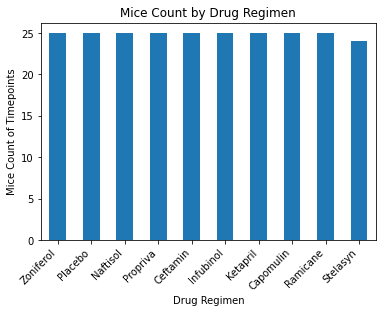

In [19]:
## plot the mouse counts for each drug using pandas
cntMice.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count of Timepoints")
plt.title("Mice Count by Drug Regimen")
plt.xticks(rotation = 45, ha = "right")
plt.show()

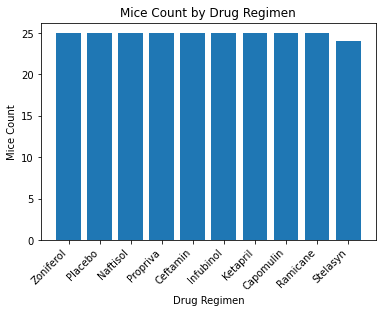

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(cntMice.index.values, cntMice.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mice Count by Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.show()

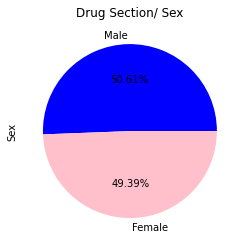

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cntMice = cleaned_study_data_complete["Sex"].value_counts()
colors = ["blue","pink"]
cntMice.plot(kind = "pie", autopct="%1.2f%%",colors=colors,startangle=0)
plt.title("Drug Section/ Sex")
plt.show()

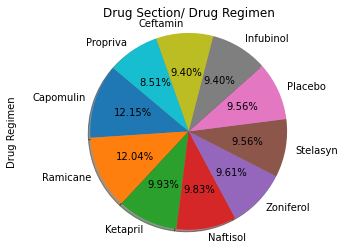

In [22]:
# Generate a pie plot showing the distribution of Drug versus male mice using pyplot
cntMice = cleaned_study_data_complete["Drug Regimen"].value_counts()
#colors = ["lightblue","pink","lightpurple","yellowgreen","lightskyblue","lightcoral",
#      "lightgrey","white","lightorange", "yellow"]
cntMice.plot(kind = "pie", autopct="%1.2f%%", shadow=True, startangle=140)
#, colors=colors)
plt.title("Drug Section/ Drug Regimen")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while 
# only keeping Capomulin, Ramicane, Infubinol, and Ceftamin

# 1. get the group data of the latest timepoint of each mouse
maxTimepoint = cleaned_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
maxTimepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [24]:
# *****error:AttributeError: 'Series' object has no attribute 'merge'
maxTimepoint = maxTimepoint.reset_index()

In [25]:
# 2. Merge group of timepoint of each mouse to get the tumor volume at the latest timepoint

cln_merge_df = maxTimepoint.merge(cleaned_study_data_complete, on=["Mouse ID", "Timepoint"], how ="left")
cln_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [26]:
# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
#set drugs to be analyzed, colors for the plots, and markers

cln_merge_df["Drug Regimen"].unique()
Drug4List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [27]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# Convert to DataFrame
#summary = pd.DataFrame({"Mean": mean1,
#                       "Median": median,
#                       "Tumor Vaolume Variance": variance,
#                        "Tumor Volume Std. Dev.": standard_deviation,
#                        "Tumor Volume Std. Error": SEM
#                       })

# Preview DataFrame
#summary

# sublist for 4 drugs  
sub_cln_merge_df = pd.DataFrame("Mouse ID", "Mouse ID",
                        "Drug Regimen",[Drug4List],
                        "Tumor Volume (mm3)", "Tumor Volume (mm3)"
)
sub_cln_merge_df

#list
#"Mouse ID","Drug Regimen","Tumor Volume (mm3)"
#u153	Ceftamin	45.000000

TypeError: __init__() takes from 1 to 6 positional arguments but 7 were given

In [28]:
# get mouse count per drug of 4 kinds
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
TumorResult_list = []
for drug in Drug4List:
    cntTumor = cln_merge_df.loc[cln_merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
cntTumor
TumorResult_list.append(cntTumor)
#print("Tumor 4drug:",[drug], [cntTumor], "result:", [TumorResult])
cntTumor

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

#def final_tumor_count(df):
#    df1 = df.copy()
#    df = df.cntTumor
#df1

In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = cntTumor.quantile([0.25, 0.5, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles [0.75]
IQR = Q3 - Q1
IQR

15.577752179999997

In [31]:
# Determine outliers using upper and lower bounds
lowerbound = Q1 - (1.5 * IQR)
upperbound = Q1 + (1.5 * IQR)
print(lowerbound, upperbound)

25.355449580000002 72.08870612


In [32]:
#????outliers???
outliers = cntTumor.loc[(cntTumor < lowerbound) | (cntTumor > upperbound)]
outliers
print(f"Potential outliers for {drug}:{outliers}.")
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= cntTumor <= (@Q3 + 1.5 * @IQR)')

Potential outliers for Ceftamin:Series([], Name: Tumor Volume (mm3), dtype: float64).


In [33]:
Innerfence = [Q1-1.5*IQR, Q3+1.5*IQR]
Innerfence

[25.355449580000002, 87.66645829999999]

In [34]:
# get the data information-- describe 
df = cntTumor  
#np.median(df["cntTumor"].values)
df.cntTumor.describe()

AttributeError: 'Series' object has no attribute 'cntTumor'

In [35]:
#np.random.seed(33454)
#df = (
#    # A standard distribution
#    pd.DataFrame({'nb': np.random.randint(0, 100, 20)})
#        # Adding some outliers
#        .append(pd.DataFrame({'nb': np.random.randint(100, 200, 2)}))
#        # Reseting the index
#        .reset_index(drop=True)
#    )

## Computing IQR
#Q1 = df['nb'].quantile(0.25)
#Q3 = df['nb'].quantile(0.75)
#IQR = Q3 - Q1

## Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

In [36]:
#    def mod_outlier(df):
#        df1 = df.copy()
#        df = df._get_numeric_data()

#        q1 = df.quantile(0.25)
#        q3 = df.quantile(0.75)

#        iqr = q3 - q1

#        lower_bound = q1 -(1.5 * iqr) 
#        upper_bound = q3 +(1.5 * iqr)

#        for col in col_vals:
#            for i in range(0,len(df[col])):
#                if df[col][i] < lower_bound[col]:            
#                    df[col][i] = lower_bound[col]

#                if df[col][i] > upper_bound[col]:            
#                    df[col][i] = upper_bound[col]    

#        for col in col_vals:
#            df1[col] = df[col]
#
#        return(df1)

In [37]:
# set drugs to be analyzed, colors for the plots, and markers

In [38]:
# isolated view of just Capomulin for later use

{'whiskers': [<matplotlib.lines.Line2D at 0x23a6d79ffa0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a6d7ac6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a6d79fc40>],
 'medians': [<matplotlib.lines.Line2D at 0x23a6d7acd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a6d7b8100>],
 'means': []}

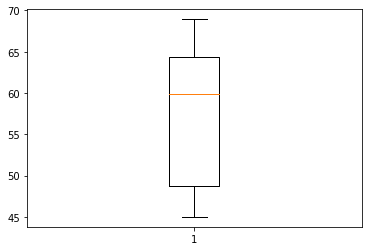

In [39]:
####????
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mark_out = dict(markerfacecolor="blue", markersize=6)
plt.boxplot(TumorResult_list,flierprops = mark_out)
#plt.boxplot(Drug4List, labels=Drug4List, flierprops=mark_out)

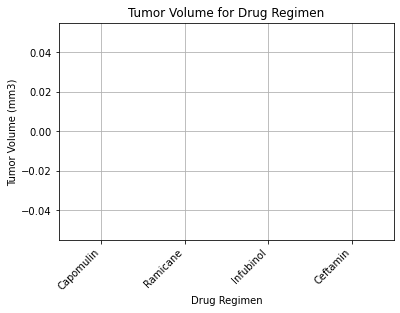

In [42]:
df = pd.DataFrame(TumorResult_list, 
                  columns=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

boxplot = df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=45, ha="right")
plt.title("Tumor Volume for Drug Regimen")
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
DrugCapomulin = cleaned_study_data_complete.loc[cleaned_study_data_complete["Drug Regimen"]=="Capomulin"]
DrugCapomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [44]:
#change index to mouse ID 
#remove other mouse IDs so only s185 shows
s185_data = DrugCapomulin.loc[DrugCapomulin["Mouse ID"]=="s185"]
s185_data

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
228,s185,0,45.000000,0,Capomulin,Female,3,17
447,s185,5,43.878496,0,Capomulin,Female,3,17
671,s185,10,37.614948,0,Capomulin,Female,3,17
714,s185,15,38.177232,0,Capomulin,Female,3,17
968,s185,20,36.866876,0,Capomulin,Female,3,17
1196,s185,25,33.949940,0,Capomulin,Female,3,17
1377,s185,30,32.959671,1,Capomulin,Female,3,17
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1849,s185,45,23.343598,1,Capomulin,Female,3,17


In [45]:
## ***Error: ValueError: ('Lengths must match to compare', (230,), (1,))

Text(0.5, 1.0, 'Capomulin Results for Mouse #s185')

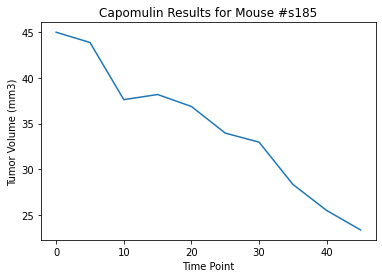

In [46]:
capomulin_table = s185_data.loc[s185_data["Drug Regimen"]=="Capomulin"]
capomulin_table.head()

mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"]=="s185"]
plt.plot(s185_data["Timepoint"], s185_data["Tumor Volume (mm3)"])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Capomulin Results for Mouse #s185")

In [1]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
